## Mini Project III

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# import Kmeans from sklearn
from sklearn.cluster import KMeans
# import DBSCAN
from sklearn.cluster import DBSCAN
# Aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
# Cluster hierarchy
import scipy.cluster.hierarchy as sch

### Do they have savings account? How much do they save?

In [2]:
saving_accounts = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\saving_accounts.csv").drop(columns = ['acct_start_date','acct_end_date'])
saving_transactions = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\saving_transactions.csv")

In [3]:
saving_accounts['saving_amt'] = saving_accounts['ending_balance'] - saving_accounts['starting_balance']

In [4]:
saving_accounts

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,starting_balance,ending_balance,saving_amt
0,1363160,13631603,100,BS,Y,113.04,122.54,9.50
1,1362487,13624873,500,MM,N,651.73,12.89,-638.84
2,1362548,13625483,100,BS,Y,250.24,254.02,3.78
3,1362752,13627523,100,BS,Y,600.26,609.33,9.07
4,1363017,13630173,100,BS,N,2011.02,2901.35,890.33
...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,177.33,528.57,351.24
417,1363038,13630383,100,BS,Y,333.53,508.26,174.73
418,1362529,13625293,100,BS,Y,662.06,873.14,211.08
419,1362895,13628953,100,BS,Y,169.96,96.25,-73.71


In [5]:
saving_accounts['account_active'].value_counts()

Y    375
N     46
Name: account_active, dtype: int64

There are 375 saving accounts and 46 no longer using saving accounts in total of 

In [6]:
saving_accounts.drop(columns = ['account_active'])

,cust_id,acct_nbr,minimum_balance,acct_type,starting_balance,ending_balance,saving_amt
0,1363160,13631603,100,BS,113.04,122.54,9.50
1,1362487,13624873,500,MM,651.73,12.89,-638.84
2,1362548,13625483,100,BS,250.24,254.02,3.78
3,1362752,13627523,100,BS,600.26,609.33,9.07
4,1363017,13630173,100,BS,2011.02,2901.35,890.33
...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,177.33,528.57,351.24
417,1363038,13630383,100,BS,333.53,508.26,174.73
418,1362529,13625293,100,BS,662.06,873.14,211.08
419,1362895,13628953,100,BS,169.96,96.25,-73.71


In [7]:
saving_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           421 non-null    int64  
 1   acct_nbr          421 non-null    int64  
 2   minimum_balance   421 non-null    int64  
 3   acct_type         421 non-null    object 
 4   account_active    421 non-null    object 
 5   starting_balance  421 non-null    float64
 6   ending_balance    421 non-null    float64
 7   saving_amt        421 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 26.4+ KB


In [8]:
round(saving_accounts.describe(),2)

,cust_id,acct_nbr,minimum_balance,starting_balance,ending_balance,saving_amt
count,421.00,421.00,421.00,421.00,421.00,421.00
mean,1362987.25,13629875.52,194.06,874.06,1258.06,384.00
std,295.18,2951.81,169.84,1704.22,2054.68,1072.17
min,1362480.00,13624803.00,100.00,100.24,2.74,-2406.27
25%,1362722.00,13627223.00,100.00,180.22,254.02,-33.13
50%,1362980.00,13629803.00,100.00,310.62,619.05,73.89
75%,1363253.00,13632533.00,100.00,742.28,1535.83,657.05
max,1363495.00,13634953.00,500.00,17303.42,22432.78,11079.85


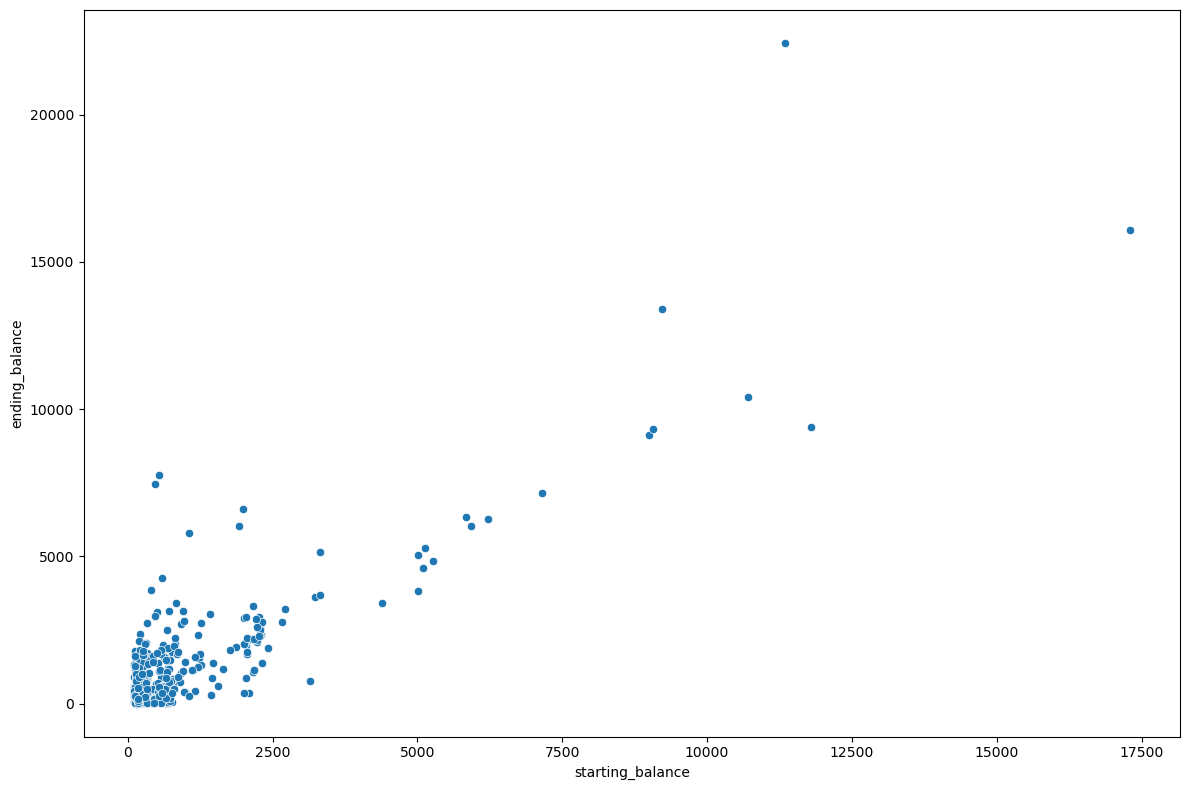

In [9]:
# Visualize starting_balance and ending_balance
fig, ax = plt.subplots(figsize = (12,8))
sns.scatterplot(x = saving_accounts['starting_balance'], y = saving_accounts['ending_balance'], data = saving_accounts, ax = ax)
fig.tight_layout()

In [10]:
# Elbow Rule
def plot_distortion(X, max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, random_state = 0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1, max_clusters + 1), distortions, marker = 'o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

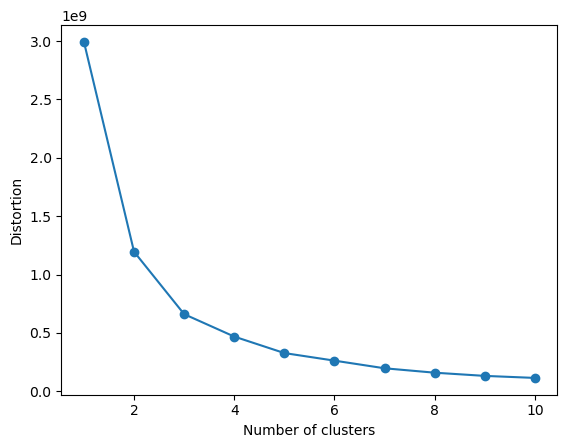

In [11]:
plot_distortion(saving_accounts[['starting_balance','ending_balance']], max_clusters = 10)

We can see in the plot while the number of clusters increases the distortion goes down. We can also see that by reaching 4 clusters, the distortion is pretty low. As a result, we will choose 4 cluster for our models

In [12]:
# Create model
model = KMeans(4)

In [13]:
# Train model
model.fit(saving_accounts[['starting_balance','ending_balance']])

KMeans(n_clusters=4)

In [14]:
# Make predictions
y_pred = model.predict(saving_accounts[['starting_balance','ending_balance']])
y_pred

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 3, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 3, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 2, 0, 0, 0, 2,

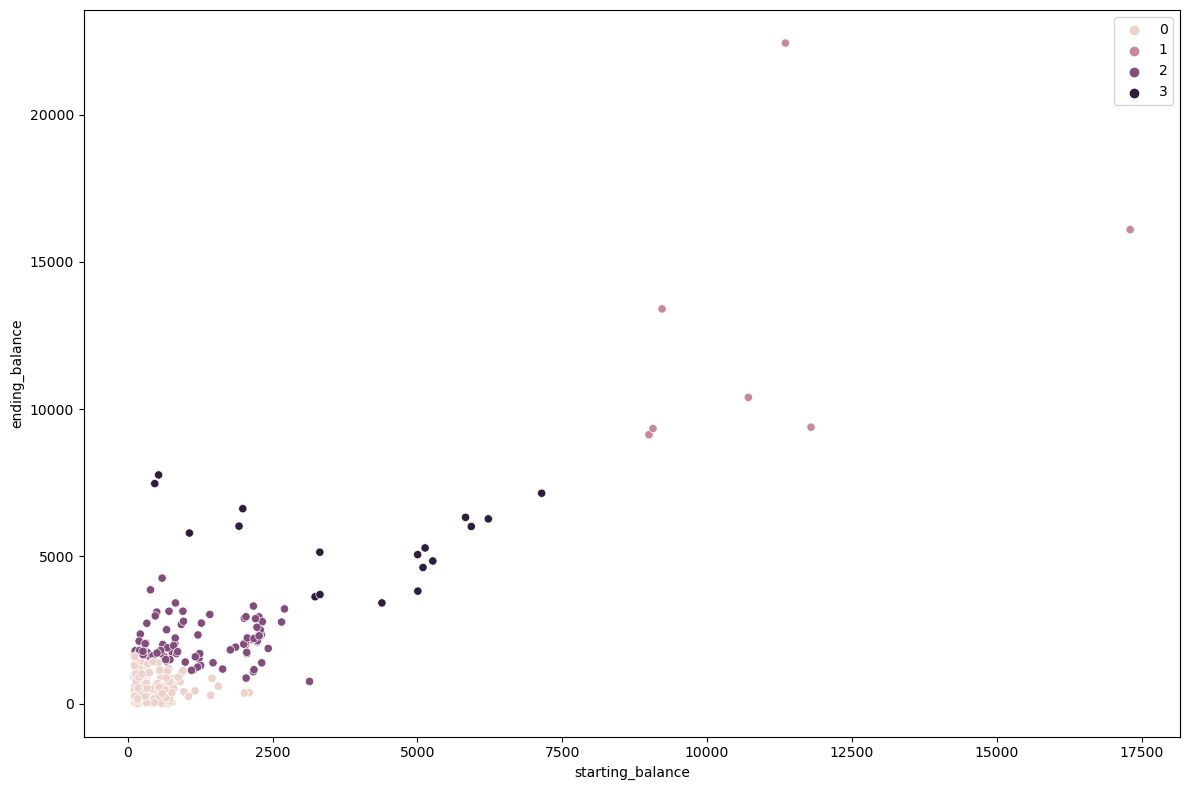

In [15]:
# Visualize Results
fig, ax = plt.subplots(figsize = (12,8))
sns.scatterplot(x = saving_accounts['starting_balance'], y = saving_accounts['ending_balance'], hue = y_pred, data = saving_accounts, ax=ax)
fig.tight_layout()

In [16]:
new_saving_accounts = saving_accounts[['acct_type','minimum_balance','starting_balance','ending_balance','saving_amt']]
new_saving_accounts

,acct_type,minimum_balance,starting_balance,ending_balance,saving_amt
0,BS,100,113.04,122.54,9.50
1,MM,500,651.73,12.89,-638.84
2,BS,100,250.24,254.02,3.78
3,BS,100,600.26,609.33,9.07
4,BS,100,2011.02,2901.35,890.33
...,...,...,...,...,...
416,BS,100,177.33,528.57,351.24
417,BS,100,333.53,508.26,174.73
418,BS,100,662.06,873.14,211.08
419,BS,100,169.96,96.25,-73.71


In [17]:
#new_saving_accounts.dropna()
#cols = ['minimum_balance', 'starting_balance','ending_balance', 'saving_amt']
#col_scaled = ['minimum_balance_scaled', 'starting_balance_scaled','ending_balance_scaled', 'saving_amt_scaled']
#scaler = StandardScaler()
#new_saving_accounts[col_scaled] = scaler.fit_transform(new_saving_accounts[cols])
#new_saving_accounts.head()

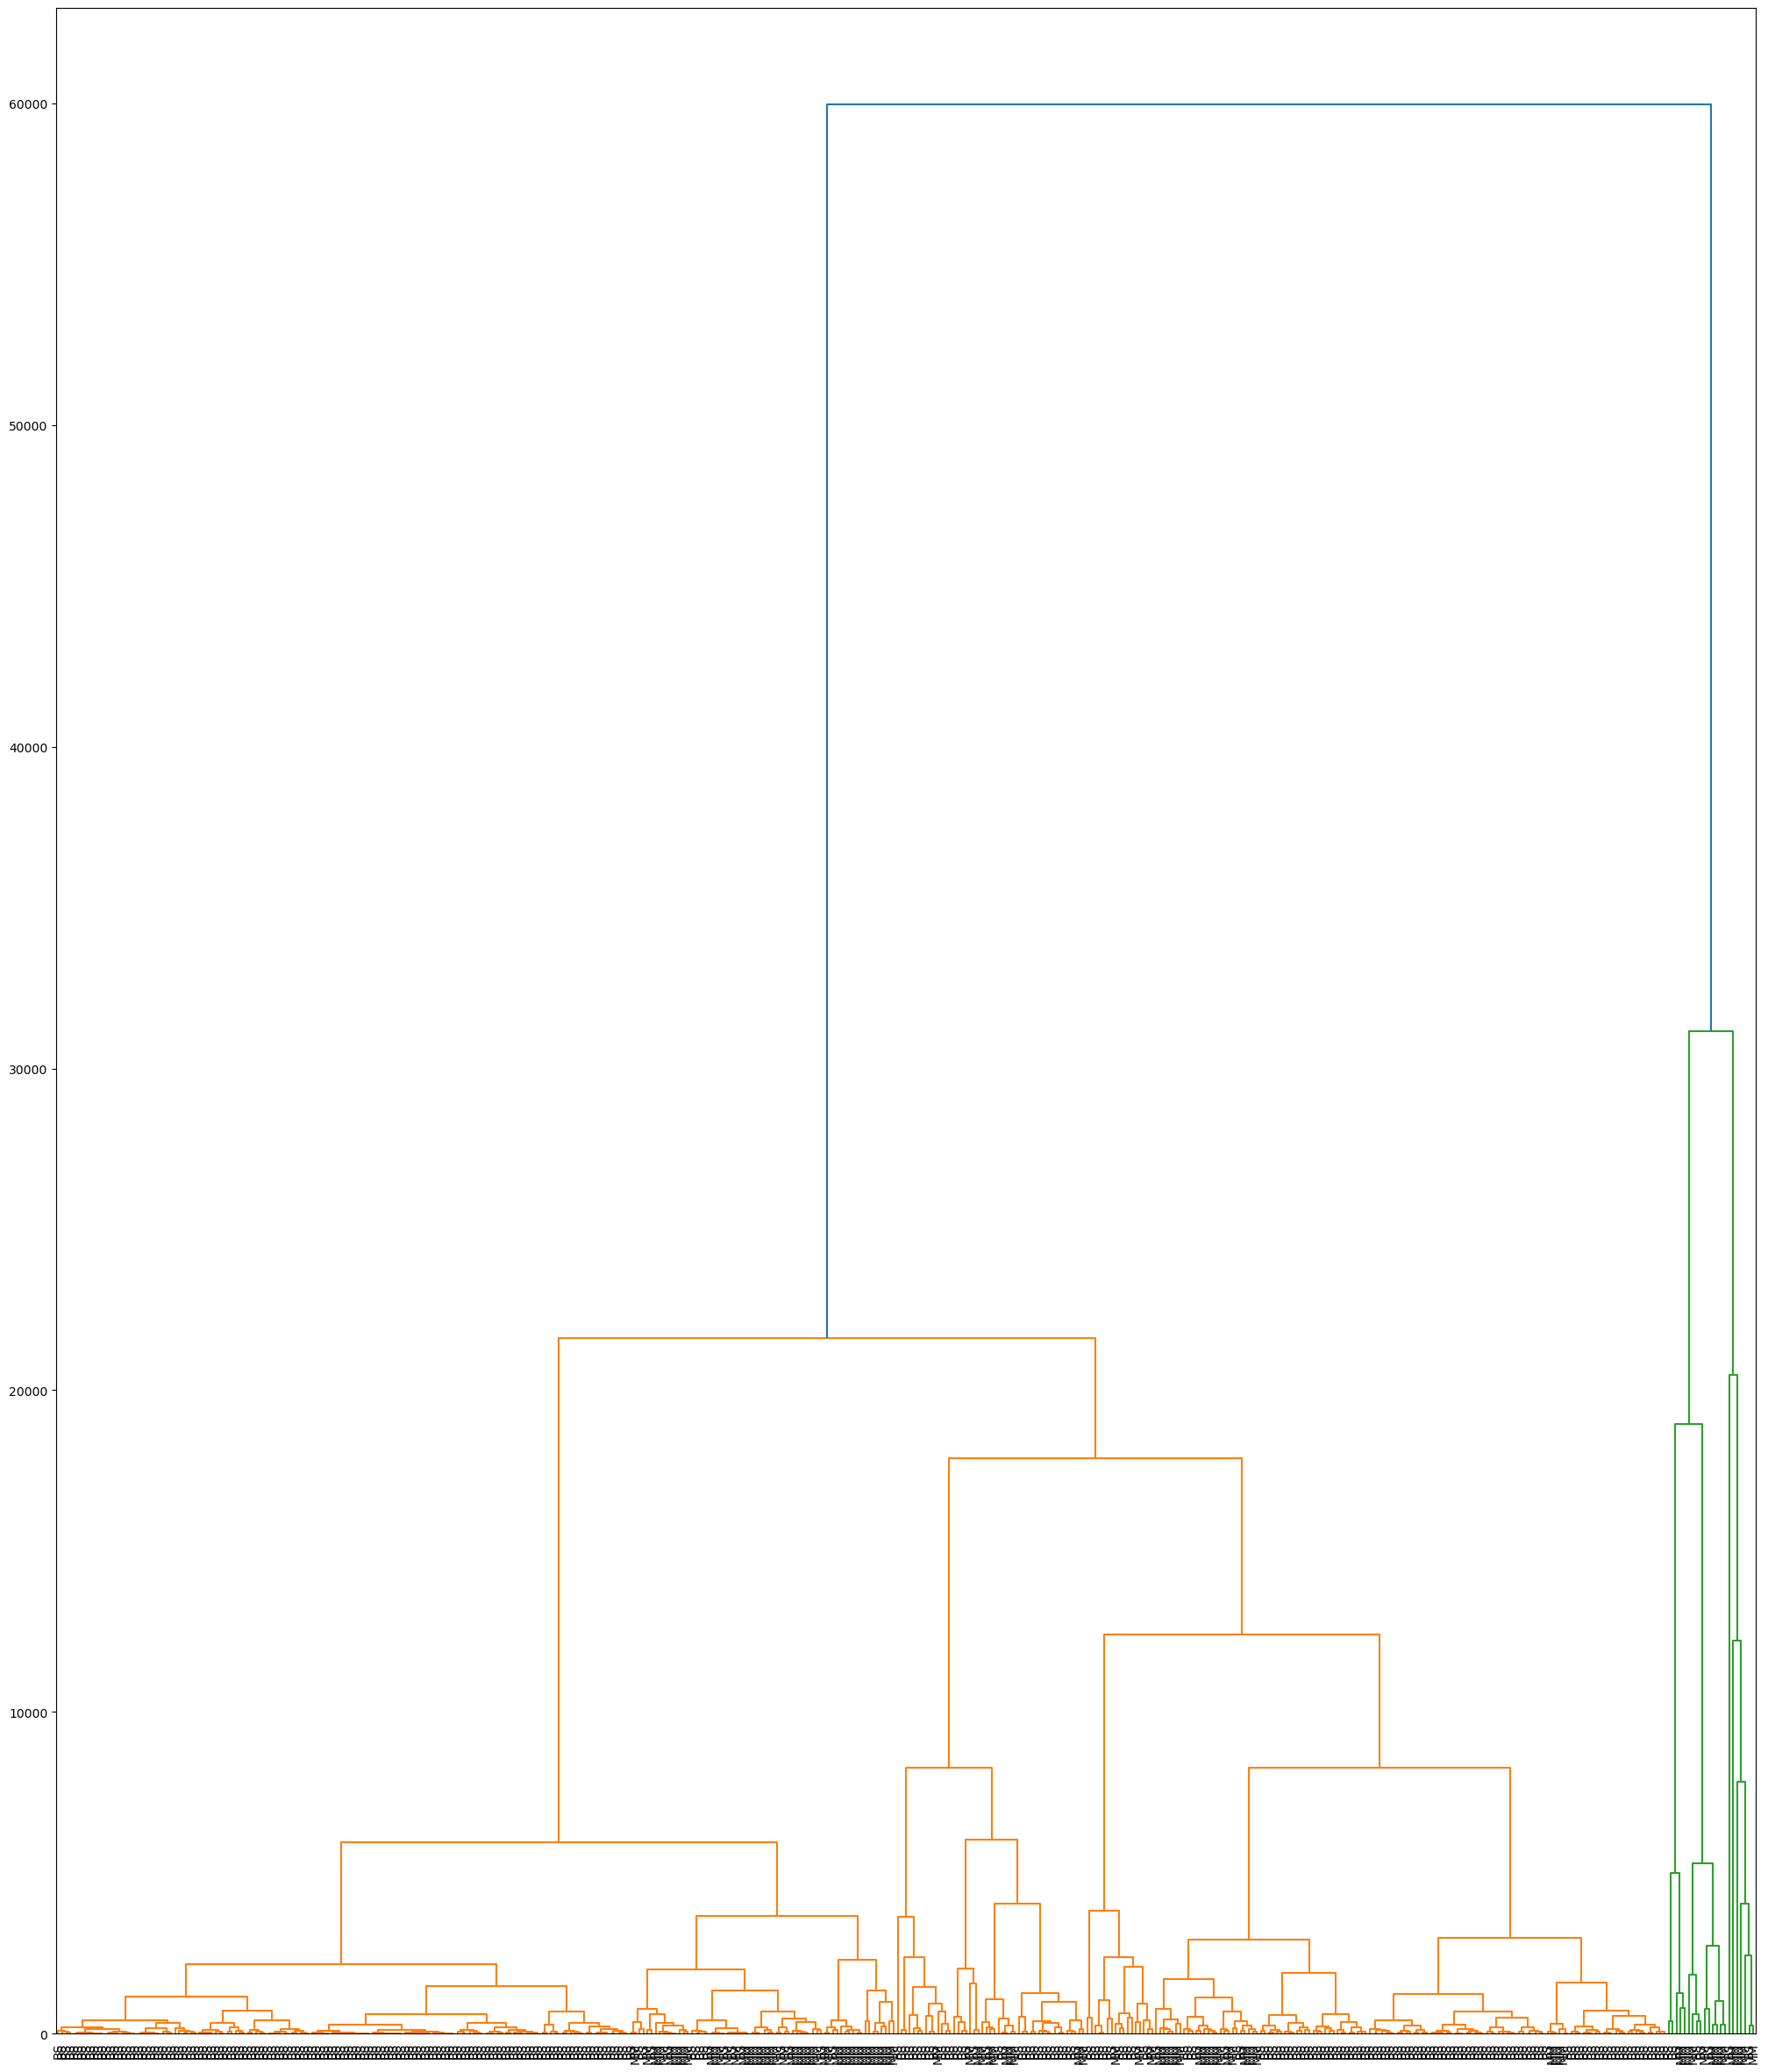

In [18]:
# Use a dendrogram to pick out optimal number of clusters
linkage_type = 'ward'
scaled_data = new_saving_accounts.iloc[:, 2:]
linkage_matrix = linkage(scaled_data,linkage_type)

plt.figure(figsize = (25,30))
labels = list(new_saving_accounts['acct_type'])

# Plot using 'dendrogram'
dendrogram(linkage_matrix, labels = labels,
           leaf_rotation = 90,
           leaf_font_size = 10)

plt.show()

In [36]:
# Run Clustering
model = AgglomerativeClustering(n_clusters = 3)
model.fit(scaled_data)

AgglomerativeClustering(n_clusters=3)

In [37]:
# Adding cluster column from output of model
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
scaled_data = new_saving_accounts.iloc[:, 2:]

clustering_model.fit(scaled_data)
label = clustering_model.labels_

new_saving_accounts['cluster'] = label
new_saving_accounts

C:\Users\quang\AppData\Local\Temp\ipykernel_15940\3281075308.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_saving_accounts['cluster'] = label


,acct_type,minimum_balance,starting_balance,ending_balance,saving_amt,cluster
0,BS,100,113.04,122.54,9.50,0
1,MM,500,651.73,12.89,-638.84,0
2,BS,100,250.24,254.02,3.78,0
3,BS,100,600.26,609.33,9.07,0
4,BS,100,2011.02,2901.35,890.33,0
...,...,...,...,...,...,...
416,BS,100,177.33,528.57,351.24,0
417,BS,100,333.53,508.26,174.73,0
418,BS,100,662.06,873.14,211.08,0
419,BS,100,169.96,96.25,-73.71,0


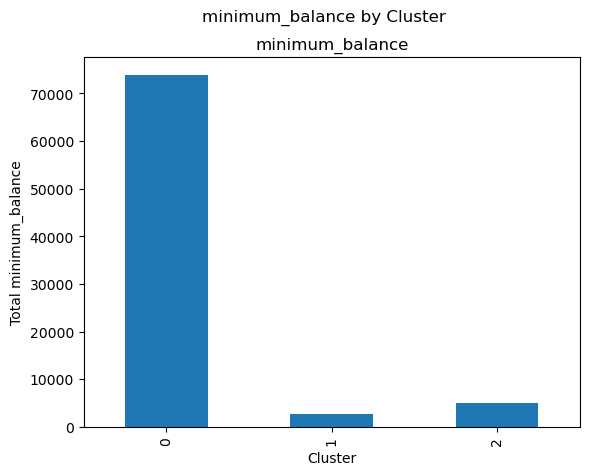

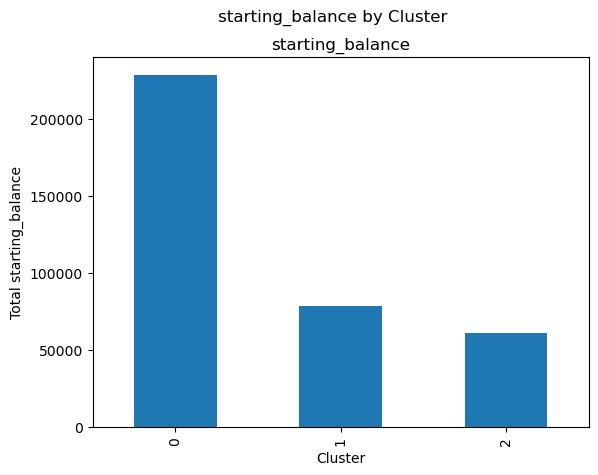

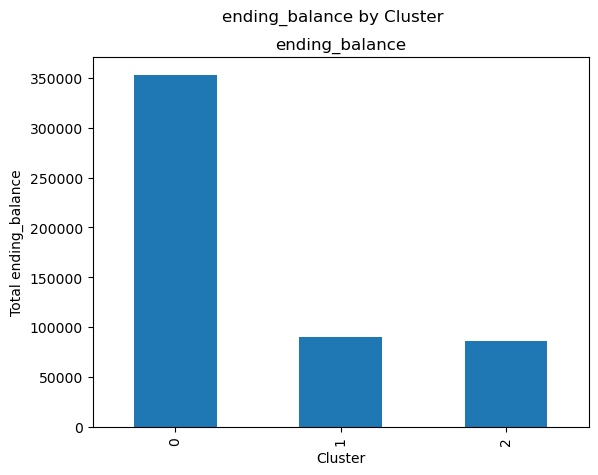

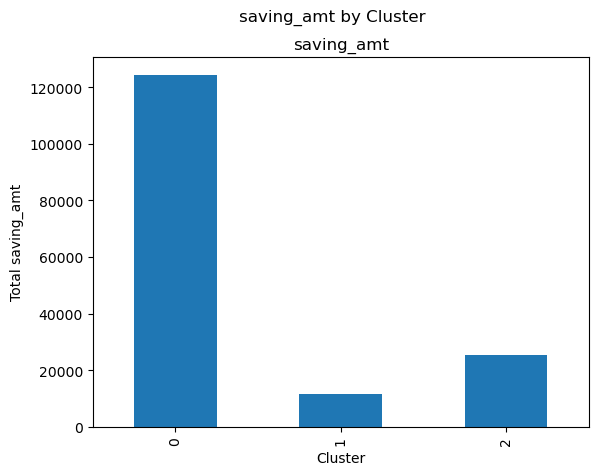

In [38]:
features = list(new_saving_accounts.columns)[1:5]
for x in features:
    plt.figure()
    new_saving_accounts.groupby(['cluster'])[x].sum().plot(kind="bar", title= x + ' by Cluster', ylabel='Total ' + x , xlabel='Cluster', figsize=(10, 6), subplots=True)
    plt.show()

According to the graph, cluster 1 save the most money in the account and custer 0 is the least one

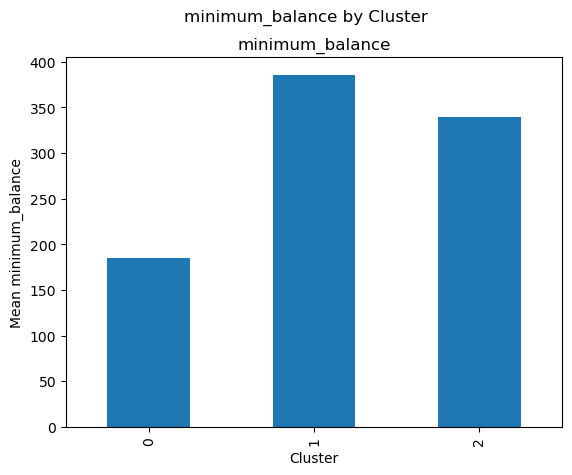

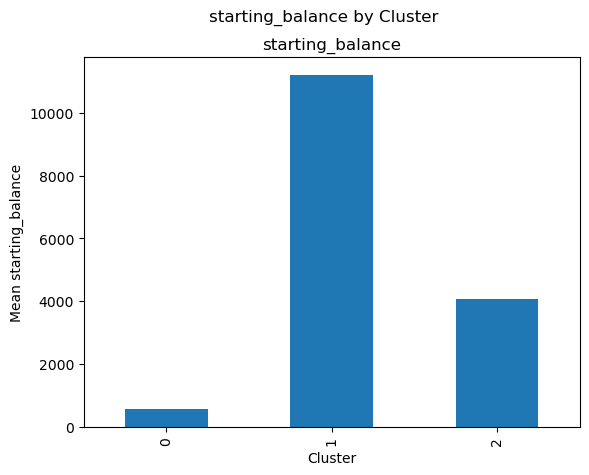

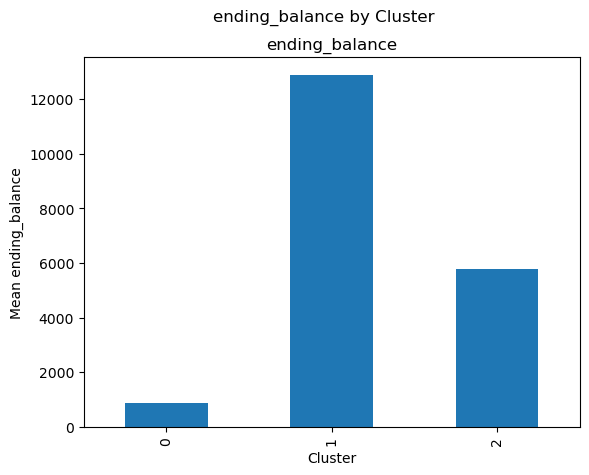

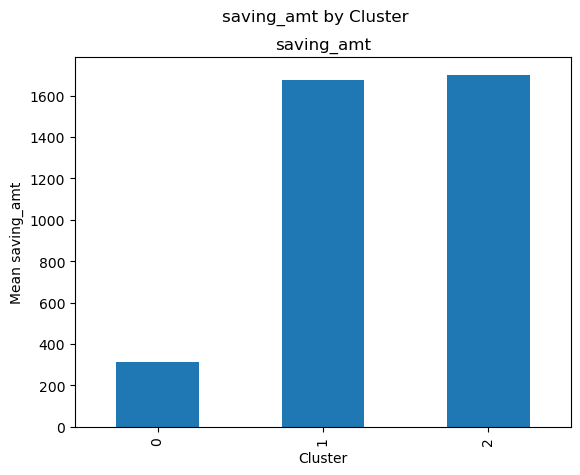

In [39]:
features = list(new_saving_accounts.columns)[1:5]
for x in features:
  plt.figure()
  new_saving_accounts.groupby(["cluster"])[x].mean().plot(kind="bar", title= x + ' by Cluster', ylabel='Mean ' + x , xlabel='Cluster', figsize=(10, 6), subplots=True)
  plt.show()

### Do they have credit account? How much do they live in debt?

In [41]:
credit_account = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\credit_account.csv").drop(columns = ['acct_start_date','acct_end_date'])
credit_transactions = pd.read_csv("D:\Python(New)\Project\Project_Week_5\Mini_Project_Week_5\clean\credit_transactions.csv")

In [42]:
credit_account['account_active'].value_counts()

Y    423
N     45
Name: account_active, dtype: int64

There are 423 account have credit account, and 45 no longer using credit account

In [43]:
credit_account['credit_dept'] = credit_account['ending_balance'] - credit_account['starting_balance']

In [44]:
credit_account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           468 non-null    int64  
 1   acct_nbr          468 non-null    int64  
 2   credit_limit      468 non-null    int64  
 3   credit_rating     468 non-null    int64  
 4   account_active    468 non-null    object 
 5   starting_balance  468 non-null    float64
 6   ending_balance    468 non-null    float64
 7   credit_dept       468 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 29.4+ KB


In [45]:
credit_account.describe()

,cust_id,acct_nbr,credit_limit,credit_rating,starting_balance,ending_balance,credit_dept
count,4.680000e+02,4.680000e+02,468.000000,468.000000,468.000000,468.000000,468.000000
mean,1.362986e+06,4.561143e+15,2647.649573,0.316239,1123.257521,1184.885662,61.628141
std,2.920717e+02,2.920717e+03,2293.771202,1.453930,1636.254478,1363.065314,2044.664956
min,1.362480e+06,4.561143e+15,1000.000000,0.000000,0.000000,0.000000,-9633.490000
25%,1.362727e+06,4.561143e+15,1000.000000,0.000000,0.000000,353.187500,-607.700000
50%,1.362974e+06,4.561143e+15,1900.000000,0.000000,568.300000,1000.000000,228.345000
75%,1.363238e+06,4.561143e+15,3000.000000,0.000000,1631.635000,1358.717500,1000.000000
max,1.363493e+06,4.561143e+15,17300.000000,10.000000,11394.660000,9500.000000,9500.000000
